5000エポックで学習した

In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [6]:
import io
        
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)

In [ ]:
# ファイルの相対パスを指定
file_path = 'data_storage/CNN_L16_v4.pth'

if torch.cuda.is_available():
    with open(file_path, 'rb') as file:
        loaded_data = pickle.load(file, encoding='latin1')
else:
    with open(file_path, 'rb') as file:
        loaded_data = CPU_Unpickler(file).load()
        
# 読み込んだデータを個々の変数に分割
spin_data, temp_data = loaded_data

In [3]:
model = torch.load('data_storage/CNN_L16_v4.pth')
model

OrderedDict([('conv.1.weight',
              tensor([[[[ 2.5340, -1.0607,  1.8495],
                        [-0.8619, -2.3940, -0.0903],
                        [-0.3224, -1.0845,  1.3103]]],
              
              
                      [[[-1.6340, -1.6388, -1.8371],
                        [-1.7702, -2.3276, -2.5660],
                        [-2.1638, -2.2748, -0.8925]]],
              
              
                      [[[-1.4907, -0.6332, -0.7898],
                        [ 2.5727, -2.2448,  0.3828],
                        [ 0.3272, -0.6255,  2.4082]]],
              
              
                      [[[ 0.5564,  1.8240,  0.3439],
                        [-1.8362,  2.8140, -1.0110],
                        [-2.2540, -0.9680,  0.5840]]],
              
              
                      [[[ 0.3435, -0.9777,  0.4397],
                        [-1.2020,  0.5952, -1.1029],
                        [ 1.5063,  2.3322, -1.9218]]]])),
             ('fc.0.weight',
            

In [12]:
# conv.1.weightの重みテンソルを取得
conv1_weight = model['conv.1.weight']
conv1_weight

tensor([[[[ 2.5340, -1.0607,  1.8495],
          [-0.8619, -2.3940, -0.0903],
          [-0.3224, -1.0845,  1.3103]]],


        [[[-1.6340, -1.6388, -1.8371],
          [-1.7702, -2.3276, -2.5660],
          [-2.1638, -2.2748, -0.8925]]],


        [[[-1.4907, -0.6332, -0.7898],
          [ 2.5727, -2.2448,  0.3828],
          [ 0.3272, -0.6255,  2.4082]]],


        [[[ 0.5564,  1.8240,  0.3439],
          [-1.8362,  2.8140, -1.0110],
          [-2.2540, -0.9680,  0.5840]]],


        [[[ 0.3435, -0.9777,  0.4397],
          [-1.2020,  0.5952, -1.1029],
          [ 1.5063,  2.3322, -1.9218]]]])

In [13]:
# NumPy配列に変換
conv1_weight_np = conv1_weight.numpy()

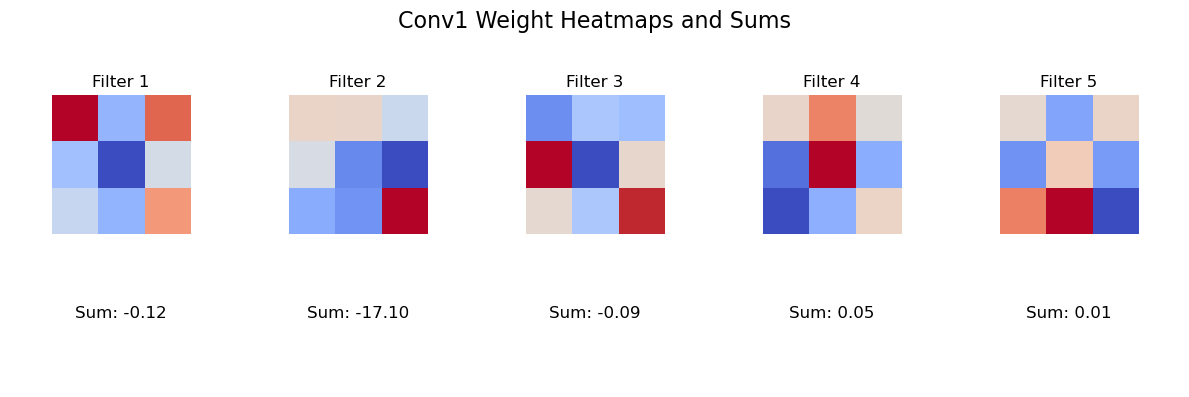

In [ ]:
# 各重みフィルターに対して成分の和を計算
filter_sums = [np.sum(filter) for filter in conv1_weight_np]

# 5つの重みフィルターとその成分の和を1つの図にプロット
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(conv1_weight_np[i, 0], cmap='coolwarm', interpolation='nearest')
    plt.title(f'Filter {i+1}')
    plt.axis('off')
    
    plt.subplot(2, 5, i+6)
    plt.text(0.5, 0.5, f'Sum: {filter_sums[i]:.2f}', fontsize=12, ha='center')
    plt.axis('off')

plt.suptitle('Conv1 Weight Heatmaps and Sums', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
fc_weight = model['fc.0.weight']
fc_weight

tensor([[-1.1184, -0.4028, -1.2472,  ...,  0.0980, -0.4875, -1.0746],
        [-0.3835, -0.3625, -2.0802,  ..., -0.5915, -0.6275, -0.2673],
        [-0.5142, -0.2515, -0.7544,  ..., -1.5252, -1.3798, -1.8302],
        ...,
        [ 0.3465,  0.3467,  0.4966,  ..., -1.0035,  0.7157,  1.2554],
        [ 0.1585,  0.3000, -0.1920,  ..., -0.7964,  0.1599, -0.0488],
        [ 0.3758,  0.0199, -0.0945,  ...,  0.6211,  0.5507,  0.0059]])

In [ ]:
fc_weight.size()

torch.Size([25, 80])

In [ ]:
# NumPy配列に変換
fc_weight_np = fc_weight.numpy()
# データを転置して正方形のデータに変形
fc_weight_np_square = fc_weight_np.T

In [ ]:
fc_weight_np_square

array([[-1.1184136 , -0.38346517, -0.5142061 , ...,  0.34649736,
         0.1584967 ,  0.37584728],
       [-0.40276074, -0.36247718, -0.25147784, ...,  0.34674546,
         0.30004597,  0.01991135],
       [-1.2472324 , -2.0801954 , -0.754438  , ...,  0.496578  ,
        -0.19200216, -0.09451459],
       ...,
       [ 0.09797969, -0.59153414, -1.5252305 , ..., -1.0035038 ,
        -0.7963647 ,  0.6211198 ],
       [-0.48745164, -0.6274926 , -1.3798273 , ...,  0.7157375 ,
         0.15986697,  0.5506944 ],
       [-1.0746131 , -0.26729745, -1.8301948 , ...,  1.2553684 ,
        -0.04883349,  0.00591184]], dtype=float32)

In [ ]:
fc_weight_np_square.shape

(80, 25)

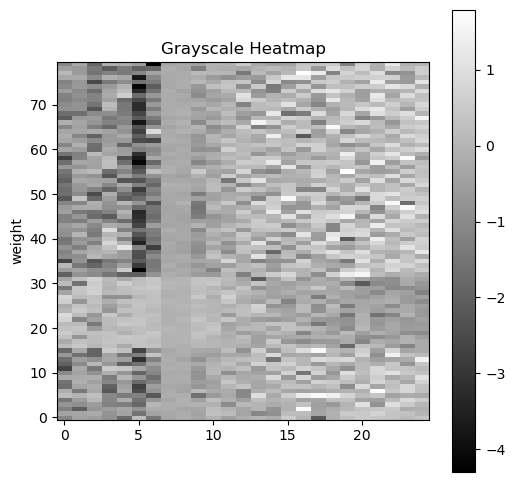

In [ ]:
# ヒートマップをプロット（白黒）
plt.figure(figsize=(6, 6))
plt.imshow(fc_weight_np_square, cmap='gray', interpolation='nearest', aspect=0.30, origin='lower')
plt.colorbar()
plt.title('Grayscale Heatmap')


# x軸とy軸に名前を付ける
plt.ylabel('weight')

plt.show()

In [ ]:
fc_weight_np_square_sum = np.sum(fc_weight_np_square, axis=0)/80
fc_weight_np_square_sum

array([-0.859873  , -0.54764575, -0.74654865, -0.54679215, -0.6021939 ,
       -1.7147688 , -0.87744695, -0.21148297, -0.20782955, -0.41184887,
       -0.17246237, -0.09685908, -0.09150036, -0.05788966, -0.06638019,
        0.0038944 , -0.00558439, -0.03710242,  0.04598955,  0.02298513,
        0.06494686,  0.12079874,  0.1501479 ,  0.1143292 ,  0.2038968 ],
      dtype=float32)

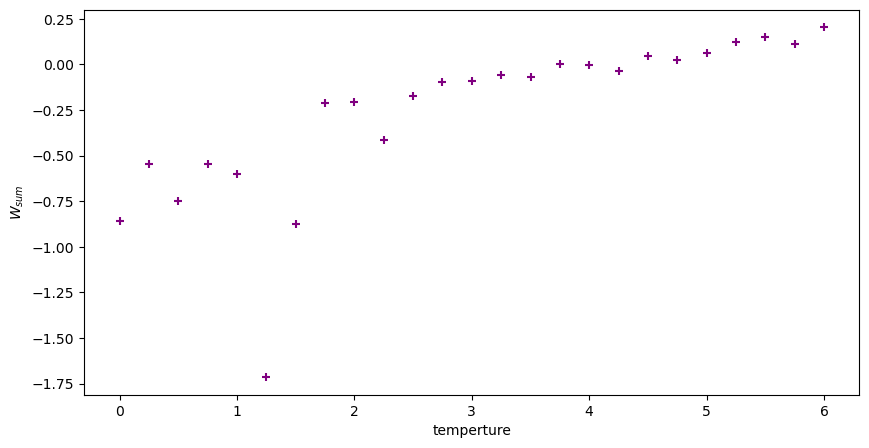

In [ ]:
x = [x*0.25 for x in range(len(fc_weight_np_square_sum))]
y = fc_weight_np_square_sum

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y, marker='+', color='purple')
plt.xlabel('temperture')
plt.ylabel('$W_{sum}$')

plt.show()

In [ ]:
x_inverse = []
for val in x:
    if val != 0:
        x_inverse.append(1 / val)
    else:
        x_inverse.append(0)  # ゼロで割り算を避けるため

x_inverse

[0,
 4.0,
 2.0,
 1.3333333333333333,
 1.0,
 0.8,
 0.6666666666666666,
 0.5714285714285714,
 0.5,
 0.4444444444444444,
 0.4,
 0.36363636363636365,
 0.3333333333333333,
 0.3076923076923077,
 0.2857142857142857,
 0.26666666666666666,
 0.25,
 0.23529411764705882,
 0.2222222222222222,
 0.21052631578947367,
 0.2,
 0.19047619047619047,
 0.18181818181818182,
 0.17391304347826086,
 0.16666666666666666]

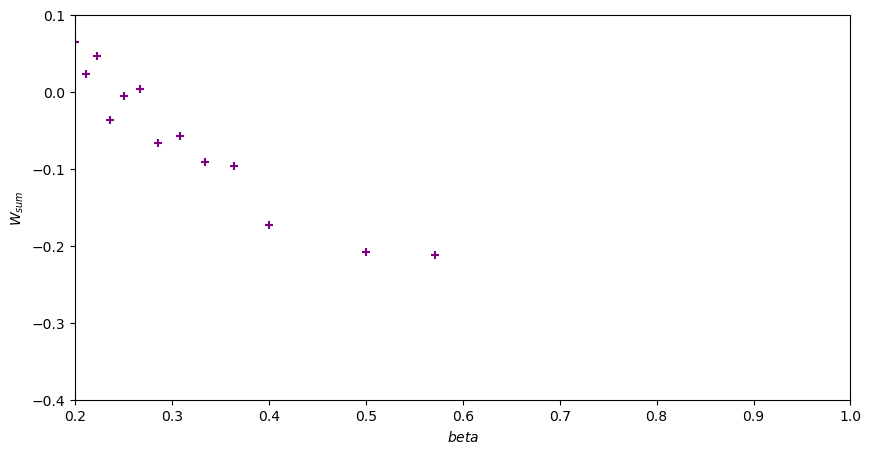

In [ ]:
x = [x*0.25 for x in range(len(fc_weight_np_square_sum))]
y = fc_weight_np_square_sum

# x軸の値を逆数に変換
x_inverse = []
for val in x:
    if val != 0:
        x_inverse.append(1 / val)
    else:
        x_inverse.append(0)  # ゼロで割り算を避けるため

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x_inverse, y, marker='+', color='purple')
plt.xlabel('$beta$')
plt.ylabel('$W_{sum}$')

# x軸の範囲を指定
plt.xlim(0.2, 1) 
plt.ylim(-0.4, 0.1)

plt.show()